In [100]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

# Однофакторный дисперсионный анализ

In [2]:
data = pd.read_csv('https://stepik.org/media/attachments/lesson/8083/genetherapy.csv')

In [9]:
data.head()

,expr,Therapy
0,100,A
1,96,A
2,101,A
3,95,A
4,103,A


In [8]:
data.groupby(data['Therapy']).mean()

,expr
Therapy,
A,99.733333
B,98.800000
C,94.400000
D,92.333333


## p < 0.05 => существуют минимум 2 значимо различимые группы

In [10]:
mod = ols('expr~Therapy', data=data).fit()

In [11]:
anova_table = sm.stats.anova_lm(mod, typ=1)

In [12]:
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Therapy,3.0,560.716667,186.905556,8.037302,0.000152
Residual,56.0,1302.266667,23.254762,NaN,NaN


## График доверительных интервалов

### Доверительная вероятность (уровень доверия) = 0.95      => уровень значимости  alpha = 0.05

In [101]:
listERR = []
listAVG = []
groups = data.Therapy.unique()
for group in groups:
    mod2 = ols('expr~Therapy', data=data[data.Therapy == group]).fit()
    listERR.append((mod2.conf_int(alpha=0.05).iloc[0].diff() / 2)[1])
    listAVG.append(data[data.Therapy == group].expr.mean())

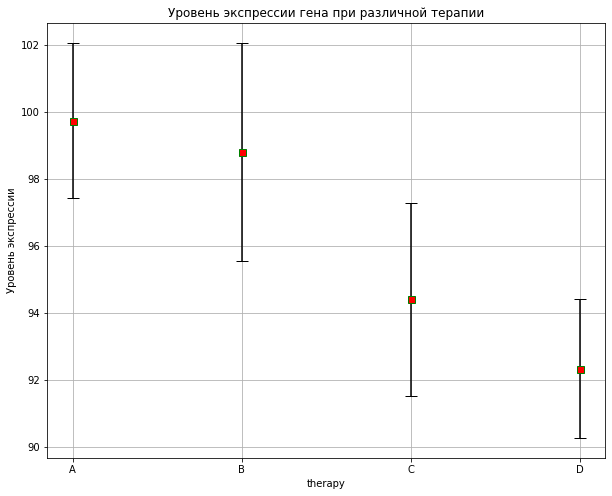

In [119]:
plt.figure(figsize=(10,8))
plt.grid(True, linestyle='-')
plt.errorbar(x=groups, y=listAVG, yerr=listERR, color="black", capsize=6, marker="s", markersize=7,\
             mfc="red", mec="green", fmt = 'o')
plt.title('Уровень экспрессии гена при различной терапии')
plt.xlabel('Вид терапии')
plt.ylabel('Уровень экспрессии')
plt.show()